NOTE
---
The data is Images

1.We can download manually images from the google

2.We can find the dataset from kaggle

3.We can build a image web crawler

4.Use python libraries to scrape the images using bing(bing is a search engine like google)

# Preprocessing
1.Resizing

2.Flattening

In [2]:
import os # to go through different folders
import matplotlib.pyplot as plt # used for displaying the image
import numpy as np #used for numerical computing
from skimage.io import imread #to read an image
from skimage.transform import resize # we need to convert all the images into same size

## Flatten method
To converting a matrix to vector or how to converting a 2D array to 1D we use flatten method

Images are in the form of matrix.They should be flattened. They can be flattened by using flatten() function

In [3]:
target = []
images = []
flat_data = []

datadir = 'E:\Image Classification\Data'
categories = ['cats','dogs','panda']

for category in categories:
  class_num = categories.index(category) #Label encoding the values
  path = os.path.join(datadir,category) #create path to use all the images
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resize = resize(img_array,(150,150,3)) #normalizes the value 0 to 1
    flat_data.append(img_resize.flatten())
    images.append(img_resize)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)
flat_data[0]

array([0.31648802, 0.51665359, 0.63822222, ..., 0.20864488, 0.13953813,
       0.08281481])

In [4]:
target

array([0, 0, 0, ..., 2, 2, 2])

In [5]:
np.unique(target,return_counts=True)

(array([0, 1, 2]), array([1000, 1000, 1000], dtype=int64))

<BarContainer object of 3 artists>

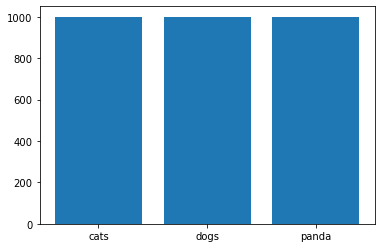

In [6]:
unique,count=np.unique(target,return_counts=True)
plt.bar(categories,count)

In [7]:
#splitting data for train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

## SVM Model

In [12]:
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score

clf = svm.SVC(C=4,kernel='rbf',gamma='scale')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",accuracy_score(y_pred,y_test))
print("Cross validation:",cross_val_score(clf,x_train,y_train,cv=5))

Accuracy: 0.6411111111111111
Cross validation: [0.65714286 0.67142857 0.67142857 0.63333333 0.62142857]


In [13]:
#save tha model using pickle library
import pickle
pickle.dump(clf,open('img_model_svm.p','wb'))
model = pickle.load(open('img_model_svm.p','rb'))

In [14]:
#testing for a new image
flat_data = []
url = input("enter the url:")
img = imread(url)
img_resize = resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)

y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f"predicted output:{y_out}")

enter the url:http://cdn.akc.org/content/article-body-image/samoyed_puppy_dog_pictures.jpg
predicted output:dogs


## Random Forest

In [15]:
# The Higher number of trees(n_estimators) give you better performance but makes your code slower.
# The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix

clf1 = RandomForestClassifier(n_estimators=150, max_depth=None,min_samples_split=2, random_state=1)
clf1.fit(x_train,y_train)
y_pred = clf1.predict(x_test)
print("Accuracy:",accuracy_score(y_pred,y_test))
print("Cross validation:",cross_val_score(clf1,x_train,y_train,cv=5))

Accuracy: 0.6455555555555555
Cross validation: [0.61666667 0.66190476 0.62142857 0.64047619 0.6452381 ]


In [16]:
#save tha model using pickle library
import pickle
pickle.dump(clf,open('img_model_rf.p','wb'))
model = pickle.load(open('img_model_rf.p','rb'))

In [19]:
#testing for a new image
flat_data = []
url = input("enter the url:")
img = imread(url)
img_resize = resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)

y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f"predicted output:{y_out}")

enter the url:https://upload.wikimedia.org/wikipedia/commons/c/c7/Tabby_cat_with_blue_eyes-3336579.jpg
predicted output:cats


## Decision tree classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix

decision_tree = DecisionTreeClassifier(random_state=1, max_depth=None)
clf2 = decision_tree.fit(x_train,y_train)
y_pred = clf2.predict(x_test)
print("Accuracy:",accuracy_score(y_pred,y_test))
print("Cross validation:",cross_val_score(clf2,x_train,y_train,cv=5))

Accuracy: 0.5077777777777778
Cross validation: [0.48809524 0.52142857 0.50714286 0.51904762 0.48095238]


In [24]:
#save tha model using pickle library
import pickle
pickle.dump(clf,open('img_model_DTC.p','wb'))
model = pickle.load(open('img_model_DTC.p','rb'))

In [25]:
#testing for a new image
flat_data = []
url = input("enter the url:")
img = imread(url)
img_resize = resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)

y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f"predicted output:{y_out}")


enter the url:https://upload.wikimedia.org/wikipedia/commons/c/c7/Tabby_cat_with_blue_eyes-3336579.jpg
predicted output:cats
